<a href="https://colab.research.google.com/github/StacyMwende/Financial_Inclusion/blob/master/Financial_Inclusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Defining the question


 ### a) Context

> Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

> Dataset: [http://bit.ly/FinancialDataset]

### b) Variable Definitions
1. Country - Country interviewee is in

2. Year - Year survey was done in

3. uniqueid - Unique identifier for each interviewee

4. location_type - Type of location: Rural, Urban

5. cellphone_access - If interviewee has access to a cellphone: Yes, No

6. household_size - Number of people living in one house

7. age_of_respondent - The age of the interviewee

8. gender_of_respondent - Gender of interviewee: Male, Female

9. relationship_with_head - house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know

10. marital_status - The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Donâ€™t know

11. education_level - Highest level of education: No formal education, Primary 

12. job_type - Type of job interviewee has: Farming and Fishing, Self 








### b) Specifying the Question

> Figure out how we can predict which individuals are most likely to have or use a bank account.

### c) Defining the Metric for success

> Getting full insights form the data and being able to figure out the individuals with the possibility of having an account

### d) Experimental Design

> Problem Understanding

> Data Understanding

> Data Preparation

> Exploratory Data Analysis
>> Univariate Data Analysis

>> Bivariate Data Analysis

>> Multivariate Data Analysis

> Modelling

## Reading the Dataset

In [0]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Loading the dataset
# #Making a list of missing value types
missing_values = ["n/a", "na", "--"]
df= pd.read_csv("Financial Dataset.csv", na_values=missing_values)
df.sample(4)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
4786,Kenya,2018,uniqueid_4787,No,Rural,Yes,3.0,75.0,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
2462,Kenya,2018,uniqueid_2463,No,Rural,Yes,5.0,50.0,Female,Head of Household,Married/Living together,No formal education,Farming and Fishing
19320,Tanzania,2017,uniqueid_4518,Yes,Rural,Yes,1.0,28.0,Female,Head of Household,Divorced/Seperated,Vocational/Specialised training,Formally employed Private
21275,Tanzania,2017,uniqueid_6473,No,Rural,No,1.0,34.0,Male,Head of Household,Divorced/Seperated,Tertiary education,Informally employed


In [33]:
#  Getting more information about the dataset
df.shape

(23524, 13)

> The dataset has 23524 entries and 13 columns

In [34]:
# Get more information about the dataset
# 
df.info()
# 
# Gives data types for the different variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


> Most of the variables have correct datatypes needed for analysis

> We will convert the household size datatype to integer in the data cleaning stage

In [35]:
# Get some statistical statistics about the data
# Does for only numerical columns
# 
df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


> There's an anomality on the year column where year 2056 is featured which will be corrected

In [36]:
# Checking for missing data
# 
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

> Most of the variables have missing data but will be corrected during data cleaning

In [37]:
# Check for deuplicates
# 
df.duplicated().any()

False

> There's no duplicated data

## Data Cleaning

In [38]:
# Renaming wrongly labelled columns
df_col = df.rename(columns={"Has a Bank account":"has_a_bank_account", "Type of Location":"type_of_location", "Cell Phone Access":"cellphone_access", "Respondent Age":"respondent_age",
                        "The relathip with head": "relationship_with_head", "Level of Educuation": "level_of_Education", "Type of Job":"type_of_job"})
# Check if the changes have been done
df_col.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cellphone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'level_of_Education', 'type_of_job'],
      dtype='object')

**Imputing missing data**

In [0]:
# We use the forward fill method to fill the missing data
# This is because the data was taken during the same period and same region
# 
df_col['country']= df_col['country'].ffill(axis = 0) 
df_col['type_of_location'] = df_col['type_of_location'].ffill(axis=0)


In [40]:
# Handling the rest of null values in the other variables
# Using the column heads for the code below
# 
cols = [i for i in df_col.columns] 
df_imp =df_col[cols].fillna(df_col.mode().iloc[0]) 
df_imp.isnull().sum()

country                   0
year                      0
uniqueid                  0
has_a_bank_account        0
type_of_location          0
cellphone_access          0
household_size            0
respondent_age            0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
level_of_Education        0
type_of_job               0
dtype: int64

In [0]:
# Convert Household data type from float to integer
# 
df_imp['household_size'] = df_imp['household_size'].astype(int)

**Checking for outliers**

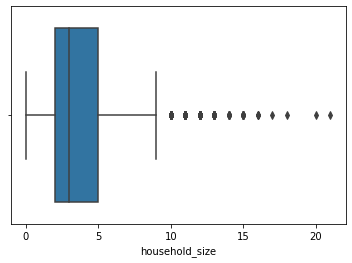

In [42]:
# Consider the household size column
# Use the original dataframe(df)
sns.boxplot(x=df_imp['household_size'])


> We observe that we have outliers which we will remove to make our results statistically significant

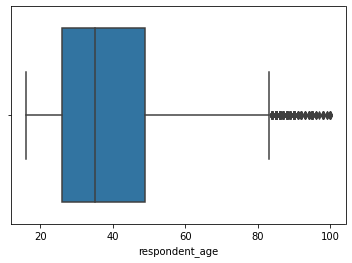

In [43]:
# Consider the Age of respondent column
# Use the original dataframe(df)
sns.boxplot(x=df_imp['respondent_age'])

> We also have outliers in this column which we will remove in the next step

In [44]:
#  Use the IQR Method to remove the outliers
# Define Q1, Q3 and IQR
#  
df_imp['year'] = df_imp['year'].astype('str')
Q1 = df_imp.quantile(0.25)
Q3 = df_imp.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
# 
# The below code will give an output with some true and false values. 
# The data point where we have False that means these values are valid 
# whereas True indicates presence of an outlier.
#
print((df_imp < (Q1 - 1.5 * IQR)) |(df_imp > (Q3 + 1.5 * IQR)))
# 
#  We can use previously calculated IQR score to filter 
# out the outliers by keeping only valid values
# 
df_iqr = df_imp[~((df_imp < (Q1 - 1.5 * IQR)) |(df_imp > (Q3 + 1.5 * IQR))).any(axis=1)]

household_size     3.0
respondent_age    23.0
dtype: float64
       cellphone_access  country  ...  uniqueid   year
0                 False    False  ...     False  False
1                 False    False  ...     False  False
2                 False    False  ...     False  False
3                 False    False  ...     False  False
4                 False    False  ...     False  False
...                 ...      ...  ...       ...    ...
23519             False    False  ...     False  False
23520             False    False  ...     False  False
23521             False    False  ...     False  False
23522             False    False  ...     False  False
23523             False    False  ...     False  False

[23524 rows x 13 columns]


**Dealing with Anomalities**

In [45]:
# Consider the year column and Level of education column
# 
print(df_iqr['year'].value_counts())
# 
print(df_iqr['level_of_Education'].value_counts())
# Remove the rows having year 2029,2056, and 2039 since we have 1 entry for each
# We also delete the rows with the entry of 6 in the level of education column

2016    8562
2018    7798
2017    6543
2039       1
2056       1
2029       1
Name: year, dtype: int64
Primary education                  12557
No formal education                 4270
Secondary education                 4114
Tertiary education                  1147
Vocational/Specialised training      787
6                                     25
Other/Dont know/RTA                    6
Name: level_of_Education, dtype: int64


In [46]:
# We create another dataframe df3 with only valid years and level of education
# 
df_new = df_iqr[(df_iqr['year'] != '2029') & (df_iqr['year'] != '2056') & (df_iqr['year'] != '2039')
      & (df_iqr['level_of_Education'] != "6")]
print(df_new['year'].value_counts())
print(df_new['level_of_Education'].value_counts())

2016    8545
2018    7793
2017    6540
Name: year, dtype: int64
Primary education                  12556
No formal education                 4270
Secondary education                 4113
Tertiary education                  1146
Vocational/Specialised training      787
Other/Dont know/RTA                    6
Name: level_of_Education, dtype: int64


> We have only the valid years and level of education included in the dataset

**Label encoding the variables**

In [47]:
# importing the library in use
from sklearn.preprocessing import LabelEncoder
# Make a copy of the dataframe as df3
df3 = df_new
# 
encoder = LabelEncoder()
df3['has_a_bank_account'] = encoder.fit_transform(df3['has_a_bank_account'])
df3['type_of_location'] = df3['type_of_location'].replace({'Rural':0, 'Urban':1})
df3['cellphone_access'] = encoder.fit_transform(df3['cellphone_access'])
df3['gender_of_respondent'] = df3['gender_of_respondent'].replace({'Female':0, 'Male':1})
df3['relationship_with_head'] = df3['relationship_with_head'].replace({'Spouse':0, 'Head of Household':1,'Other relative':2, 'Child':3,
                                'Parent':4, 'Other non-relatives':5})
df3['marital_status'] = df3['marital_status'].replace({'Married/Living together':0, 'Widowed':1, 'Single/Never Married':2, 'Divorced/Seperated':3, 'Dont know':4 })
df3['level_of_Education'] = df3['level_of_Education'].replace({'Primary education':0, 'No formal education':1, 'Secondary education':2, 'Tertiary education':3,
                           'Vocational/Specialised training':4, 'Other/Dont know/RTA':5 })
df3['type_of_job'] = df3['type_of_job'].replace({'Self employed':0, 'Informally employed':1, 'Farming and Fishing':2, 'Remittance Dependent':3,
                           'Other Income':4, 'Formally employed Private':5, 'No Income':6, 'Formally employed Government':7,'Government Dependent':8,
                           'Dont Know/Refuse to answer':9 })

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

### Univariate Analysis 

In [0]:
import seaborn as sns
%matplotlib inline

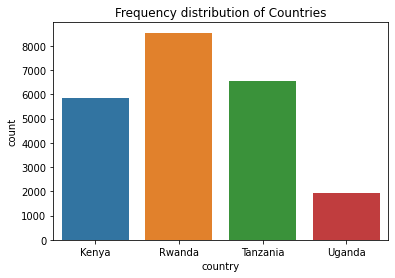

In [49]:
# Frequency count of country column
# 
sns.countplot(x= 'country', data=df3)
plt.title("Frequency distribution of Countries" )
plt.show()

> Rwanda leads with having most people participating in the survey

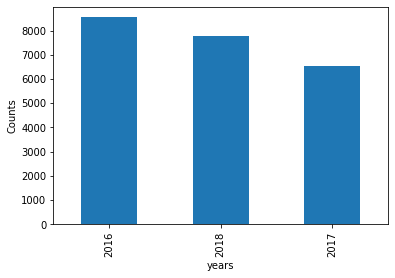

In [50]:
# Year column
# Bar graph
# 
df3['year'].value_counts().plot(kind='bar')
plt.xlabel("years")
plt.ylabel("Counts")
plt.show()

> Most of the data was collected in 2016 with 2018 and 2017 following respectively

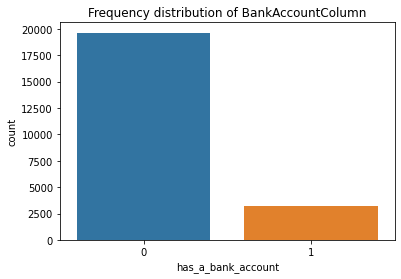

In [51]:
# A distribution of bank ownership
# 
sns.countplot(x= 'has_a_bank_account', data=df3)
plt.title("Frequency distribution of BankAccountColumn" )
plt.show()

> 0 - No and 1 - Yes

>> Most of the respondents did not have bank accounts

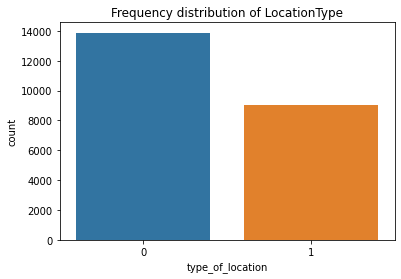

In [52]:
# A distribution of how the respondents where distributed
# 
sns.countplot(x= 'type_of_location', data=df3)
plt.title("Frequency distribution of LocationType" )
plt.show()

> Rural - 0 and Urban - 1

>> Most respondents were from the rural

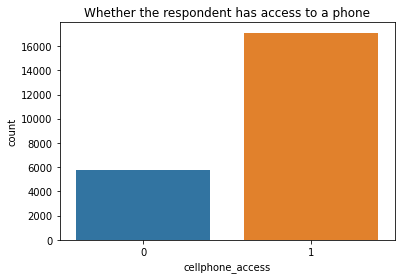

In [53]:
# Cell_phone access column
# 
sns.countplot(x='cellphone_access', data=df3)
plt.title("Whether the respondent has access to a phone")
plt.show()

> Yes - 1 and 0 - No

>> Most respondents had access to cell phones

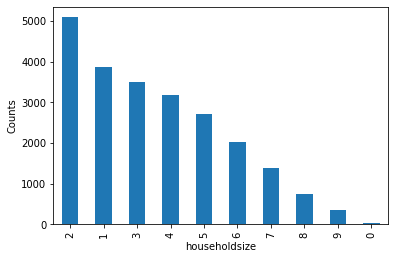

In [54]:
# Frequency distribution for householdsize
# 
df3['household_size'].value_counts().plot(kind='bar')
plt.xlabel("householdsize")
plt.ylabel("Counts")
plt.show()

> We observe that most households had 2 people at most living in the same house with the numbers progressively reducing as we move across large household size

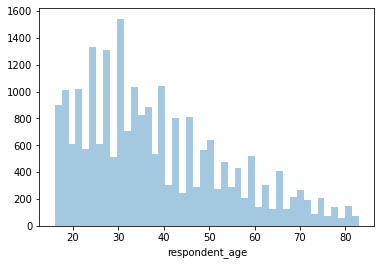

In [55]:
# Respondent Age column
# 
sns.distplot(df3.respondent_age, kde=False)
plt.show()

> Data is skewed to the left which means most of the respondents were of the age of between 15 years to 40


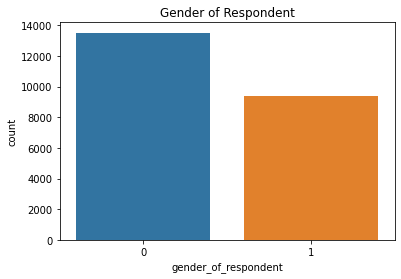

In [56]:
# Gender of respondent column
# 
sns.countplot(x="gender_of_respondent", data=df3)
plt.title("Gender of Respondent")
plt.show()

> Female - 0,  Male - 1

>> Most of the respondents were Female

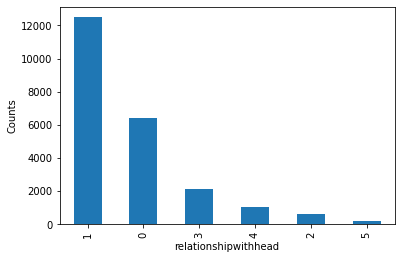

In [57]:
# Frequency distribution for realtionshipwithhead
# 
df3['relationship_with_head'].value_counts().plot(kind='bar')
plt.xlabel("relationshipwithhead")
plt.ylabel("Counts")
plt.show()

> Spouse:0,  Head of Household:1, Other relative:2,  Child:3,  Parent:4,  Other non-relatives:5

>> Most people who participated in the survey were the spouses to the household heads with other non-relatives being the least

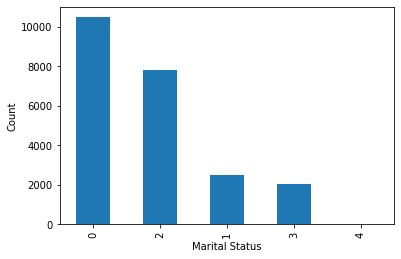

In [58]:
# Marital Status Column
# 
df3['marital_status'].value_counts().plot(kind='bar')
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

> Married/Living together:0,  Widowed:1,  Single/Never Married:2,  Divorced/Seperated:3,  Dont know:4 

> Most of the interviewees were Married, with the single ones following next and afew not knowing their status

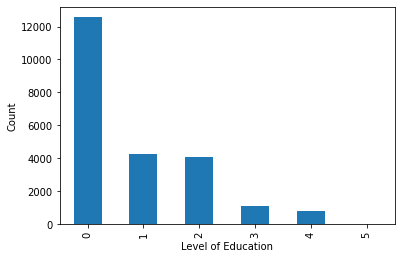

In [59]:
# Level of Education Column
# 
df3['level_of_Education'].value_counts().plot(kind='bar')
plt.xlabel("Level of Education")
plt.ylabel("Count")
plt.show()

> Primary education:0,  No formal education:1,  Secondary education:2, Tertiary education:3,  Vocational/Specialised training:4, Other/Dont know/RTA:5 

>> Most respondents had Primary School as their highest level of education

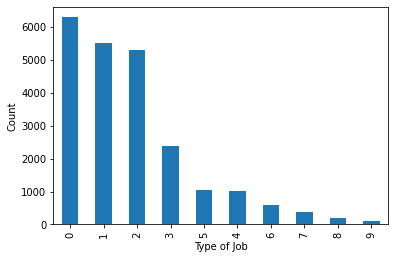

In [60]:
# Level of Type of Job Column
# 
df3['type_of_job'].value_counts().plot(kind='bar')
plt.xlabel("Type of Job")
plt.ylabel("Count")
plt.show()

> Self employed:0,  Informally employed:1,  Farming and Fishing:2,  Remittance Dependent:3,  Other Income:4,   Formally employed Private:5,  No Income:6,Formally employed Government:7,  Government Dependent:8,  Dont Know/Refuse to answer:9

>> Self employed topped the survey with a very small number having refused to answer

### Bivariate Analysis

> It involves comparing 2 variables

Text(0, 0.5, 'Count')

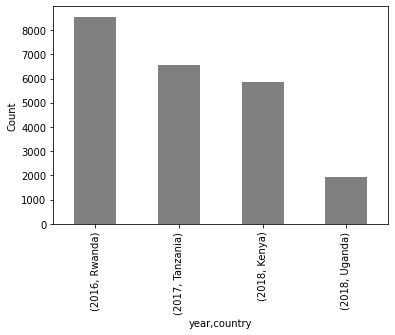

In [61]:
# Create a visualization to see how the data was collected over the years
# 
Count_year = df3.groupby (['year','country',])['country'].count()
Count_year.plot(kind='bar', color='grey')
plt.ylabel('Count')

> We observe that data was collected in different years for the 4 countries

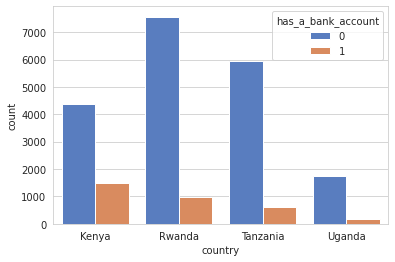

In [62]:
# Comparing the countries to see the distribution of the bank accounts
# 
sns.set_style('whitegrid')
sns.countplot(x='country',hue='has_a_bank_account',data=df3,palette='muted')

> Yes-1,  No-0

>> Rwanda led as the country with most respondents not having bank accounts
with Kenya leading with most respondents having bank accounts.

>> Uganda was least in both

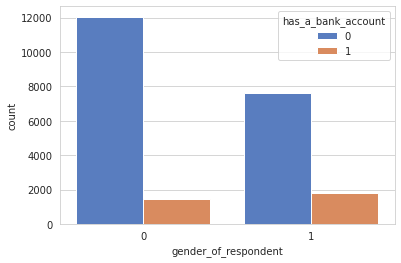

In [63]:
# Comparing Account ownership btwn the 2 gender groups
# 
sns.set_style('whitegrid')
sns.countplot(x='gender_of_respondent',hue='has_a_bank_account',data=df3,palette='muted')

> Yes - 1,  No - 0

>> Most female respondents did not have acess to bank accounts with slightly more male respondents having bank accounts compared to females

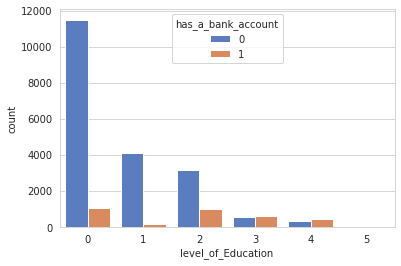

In [64]:
# Account owwership Vs Level of education
# 
sns.set_style('whitegrid')
sns.countplot(x='level_of_Education',hue='has_a_bank_account',data=df3,palette='muted')

> Primary education:0, No formal education:1, Secondary education:2, Tertiary education:3, Vocational/Specialised training:4, Other/Dont know/RTA:5

>> We observe that respondents with Primary level of education led with the number having no bank accounts and precisely the same with the highest ownership of bank accounts with No formal level of education following next as the people not having accounts with the Tertiary level of education respondents having nearly equally the same number for both people having and not having accounts.

>> We can also observe that very few people with adavanced education participated for the surevey and they had bank accounts.


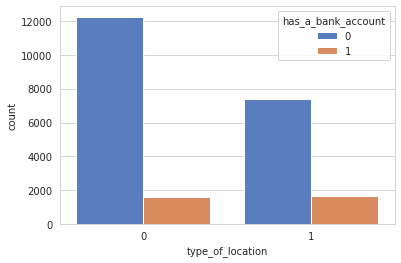

In [65]:
# Account owwership Vs type of Location
# 
sns.set_style('whitegrid')
sns.countplot(x='type_of_location',hue='has_a_bank_account',data=df3,palette='muted')

> Yes - 1, No - 0

>> Most respondents from the rural areas did not have bank accounts compared to people in the urban areas with an equal number in both regions having bank accounts.

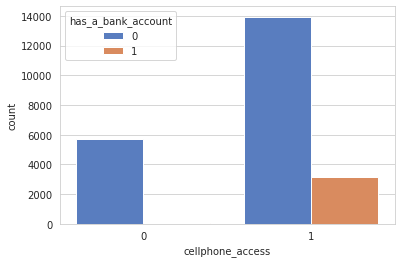

In [66]:
# Account owwership Vs Access to a cellphone
# 
sns.set_style('whitegrid')
sns.countplot(x='cellphone_access',hue='has_a_bank_account',data=df3,palette='muted')

> Yes - 1, No - 0

> Most of the respondents had access to a cellphone but also led as the group with no bank accounts.

>> This cound be an indication that most of them considered doing mobile transactions compared to bank transactions

> Less that 1000 of the people who did not have access to a cellphone lacked bank accounts.

>> Could mean that the lacked financial education and the need for bank acounts even without cell phones


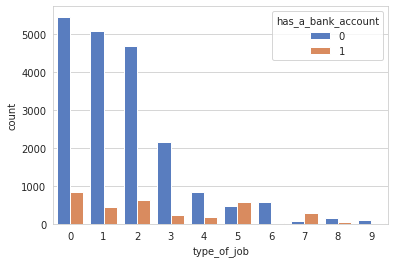

In [67]:
# Account owwership Vs type_of_job
# 
sns.set_style('whitegrid')
sns.countplot(x='type_of_job',hue='has_a_bank_account',data=df3,palette='muted')

> Self employed:0, Informally employed:1, Farming and Fishing:2, Remittance Dependent:3, Other Income:4, Formally employed Private:5, No Income:6,Formally employed Government:7, Government Dependent:8, Dont Know/Refuse to answer:9

>> Self employed group had most people without bank accounts with also having most people having bank accounts compared to the rest of the job types.

>> People doing Farming and fishing followed closely in numbers as the group with most people having bank accounts

>> Respondents from the Private sector had closely an equal tally of both owning and not owning a bank account.

>> Respondents formally employed by the government had a big gap of people owning and not owning accounts with a big number of those who participated in the survey possessing bank accounts



In [68]:
# Correlation matrix to see the correlation between the different variables
# 
df3.corr()

,has_a_bank_account,type_of_location,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_Education,type_of_job
has_a_bank_account,1.000000,0.089255,0.209541,-0.021881,0.025301,0.116590,-0.038164,-0.072204,0.339165,0.179876
type_of_location,0.089255,1.000000,-0.090855,-0.286670,-0.048825,0.011991,0.032224,0.241884,0.084094,-0.068507
cellphone_access,0.209541,-0.090855,1.000000,0.110665,-0.080501,0.103102,-0.011526,-0.120117,0.138177,0.027118
household_size,-0.021881,-0.286670,0.110665,1.000000,-0.105352,0.010032,0.077390,-0.336937,-0.010001,0.042256
respondent_age,0.025301,-0.048825,-0.080501,-0.105352,1.000000,0.014217,-0.282122,-0.221675,-0.095886,-0.005905
gender_of_respondent,0.116590,0.011991,0.103102,0.010032,0.014217,1.000000,0.237185,0.015945,0.039438,-0.053304
relationship_with_head,-0.038164,0.032224,-0.011526,0.077390,-0.282122,0.237185,1.000000,0.441977,0.123554,0.086515
marital_status,-0.072204,0.241884,-0.120117,-0.336937,-0.221675,0.015945,0.441977,1.000000,0.070569,-0.035828
level_of_Education,0.339165,0.084094,0.138177,-0.010001,-0.095886,0.039438,0.123554,0.070569,1.000000,0.236945
type_of_job,0.179876,-0.068507,0.027118,0.042256,-0.005905,-0.053304,0.086515,-0.035828,0.236945,1.000000


> A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neural or zero, meaning that the variables are unrelated.

>> We observe a perfect linear relationship between a variable and itself which is normal

>> There is a positive linear relationship between the level of education and bank account ownership.

>> A negative relationship is observed between maritas status and bank account ownership which means that maritas status does not determine whether someone must have a bank account or not.

In [69]:
# Having considered having a bank account as our targrt variable, we now create
# a datafrma with people owning bank accounts
# 
bank_acc = df3[df3['has_a_bank_account'] == 1]
bank_acc.sample(2)

,country,year,uniqueid,has_a_bank_account,type_of_location,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_Education,type_of_job
13685,Rwanda,2016,uniqueid_7618,1,0,1,5,29.0,0,0,0,2,7
17930,Tanzania,2017,uniqueid_3128,1,0,1,1,31.0,0,1,3,4,5


In [70]:
# check the original shape of the dataset
print(df.shape)
# 
# Print out the shape of respondents owning bank accounts
print(bank_acc.shape)

(23524, 13)
(3242, 13)


> We observe that out of the total number of entries, only 3303 people had bank accouts in the 4 countries considered which is a small number

Text(0, 0.5, 'Bank Accounts')

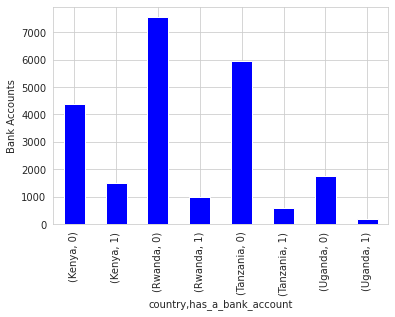

In [71]:
# Account ownership across the countries
# 
df3.groupby(['country','has_a_bank_account'])['has_a_bank_account'].count().plot(kind='bar', color='blue')
plt.ylabel('Bank Accounts')

> We observe that Kenya leads with most people having bank accounts which is an indication of financial inclusion.

> We therefore create a new dataframe with only kenyan respondents and see what kenya does best to ensure inclusion of it's citizens though the numbers are still very small

In [72]:
# Create a dataframe with only kenya respondents
# 
df_kenya = bank_acc[bank_acc['country']== 'Kenya']
df_kenya.sample(4)

,country,year,uniqueid,has_a_bank_account,type_of_location,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_Education,type_of_job
3492,Kenya,2018,uniqueid_3493,1,1,1,4,37.0,1,1,0,4,5
1083,Kenya,2018,uniqueid_1084,1,1,1,2,31.0,1,1,0,2,0
2567,Kenya,2018,uniqueid_2568,1,0,1,3,26.0,0,3,2,2,0
4472,Kenya,2018,uniqueid_4473,1,0,1,3,24.0,0,0,0,2,2


In [73]:
# Print out the shape of respondents owning bank accounts
print(bank_acc.shape)
# 
# Check the shape of the kenyan dataframe
print(df_kenya.shape)

(3242, 13)
(1492, 13)


> Slightly close to half of the respondents who had bank accounts were from Kenya

Text(0, 0.5, 'Bank Accounts')

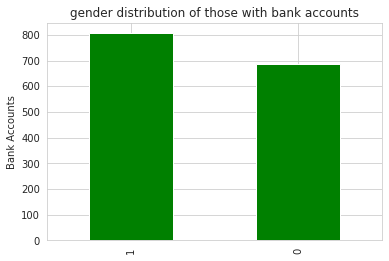

In [74]:
# Gender Vs Bank Account
# 
df_kenya['gender_of_respondent'].value_counts().plot.bar(title='gender distribution of those with bank accounts', color='green')
plt.ylabel('Bank Accounts')

> We observe a difference of about 110 of between males and females who ownwed accounts.

>> This translates to equal opportunity to financial knowledge to both genders.

> The rest of the coutries should ensure that everyone has equal opportunity to knowledge access pertaining finances if not in place already

Text(0, 0.5, 'Bank Accounts')

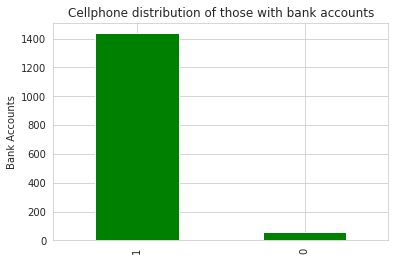

In [75]:
# Cellphone access vs bank account
# 
df_kenya['cellphone_access'].value_counts().plot.bar(title='Cellphone distribution of those with bank accounts', color='green')
plt.ylabel('Bank Accounts')

> It is clear that most of the people who had access to a cellphone had bank accounts in place as well.

>> This could translate to more people acessing their bank accounts & Services via cellphones hence able to make transactions such as payment of utilities and other routine expenses and access to small loans 

Text(0, 0.5, 'Bank Accounts')

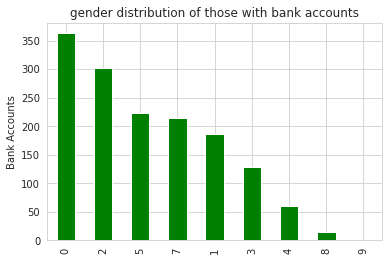

In [76]:
df_kenya['type_of_job'].value_counts().plot.bar(title='gender distribution of those with bank accounts', color='green')
plt.ylabel('Bank Accounts')

> Self employed:0, Informally employed:1, Farming and Fishing:2, Remittance Dependent:3, Other Income:4, Formally employed Private:5, No Income:6,Formally employed Government:7, Government Dependent:8, Dont Know/Refuse to answer:9

>> Of the total number of respondents, about 360 of them who were self employed had bank accounts with people in the Farming and Fishings following with about 310 persons with bank accounts. The rest of the job types followed progressivel as shown above.

> Other countries should in place encourage the people in the private sector and have then know about the benefits of having accounts such as ability to acess loans for start ups.

### Multivariate Analysis

<Figure size 800x640 with 0 Axes>

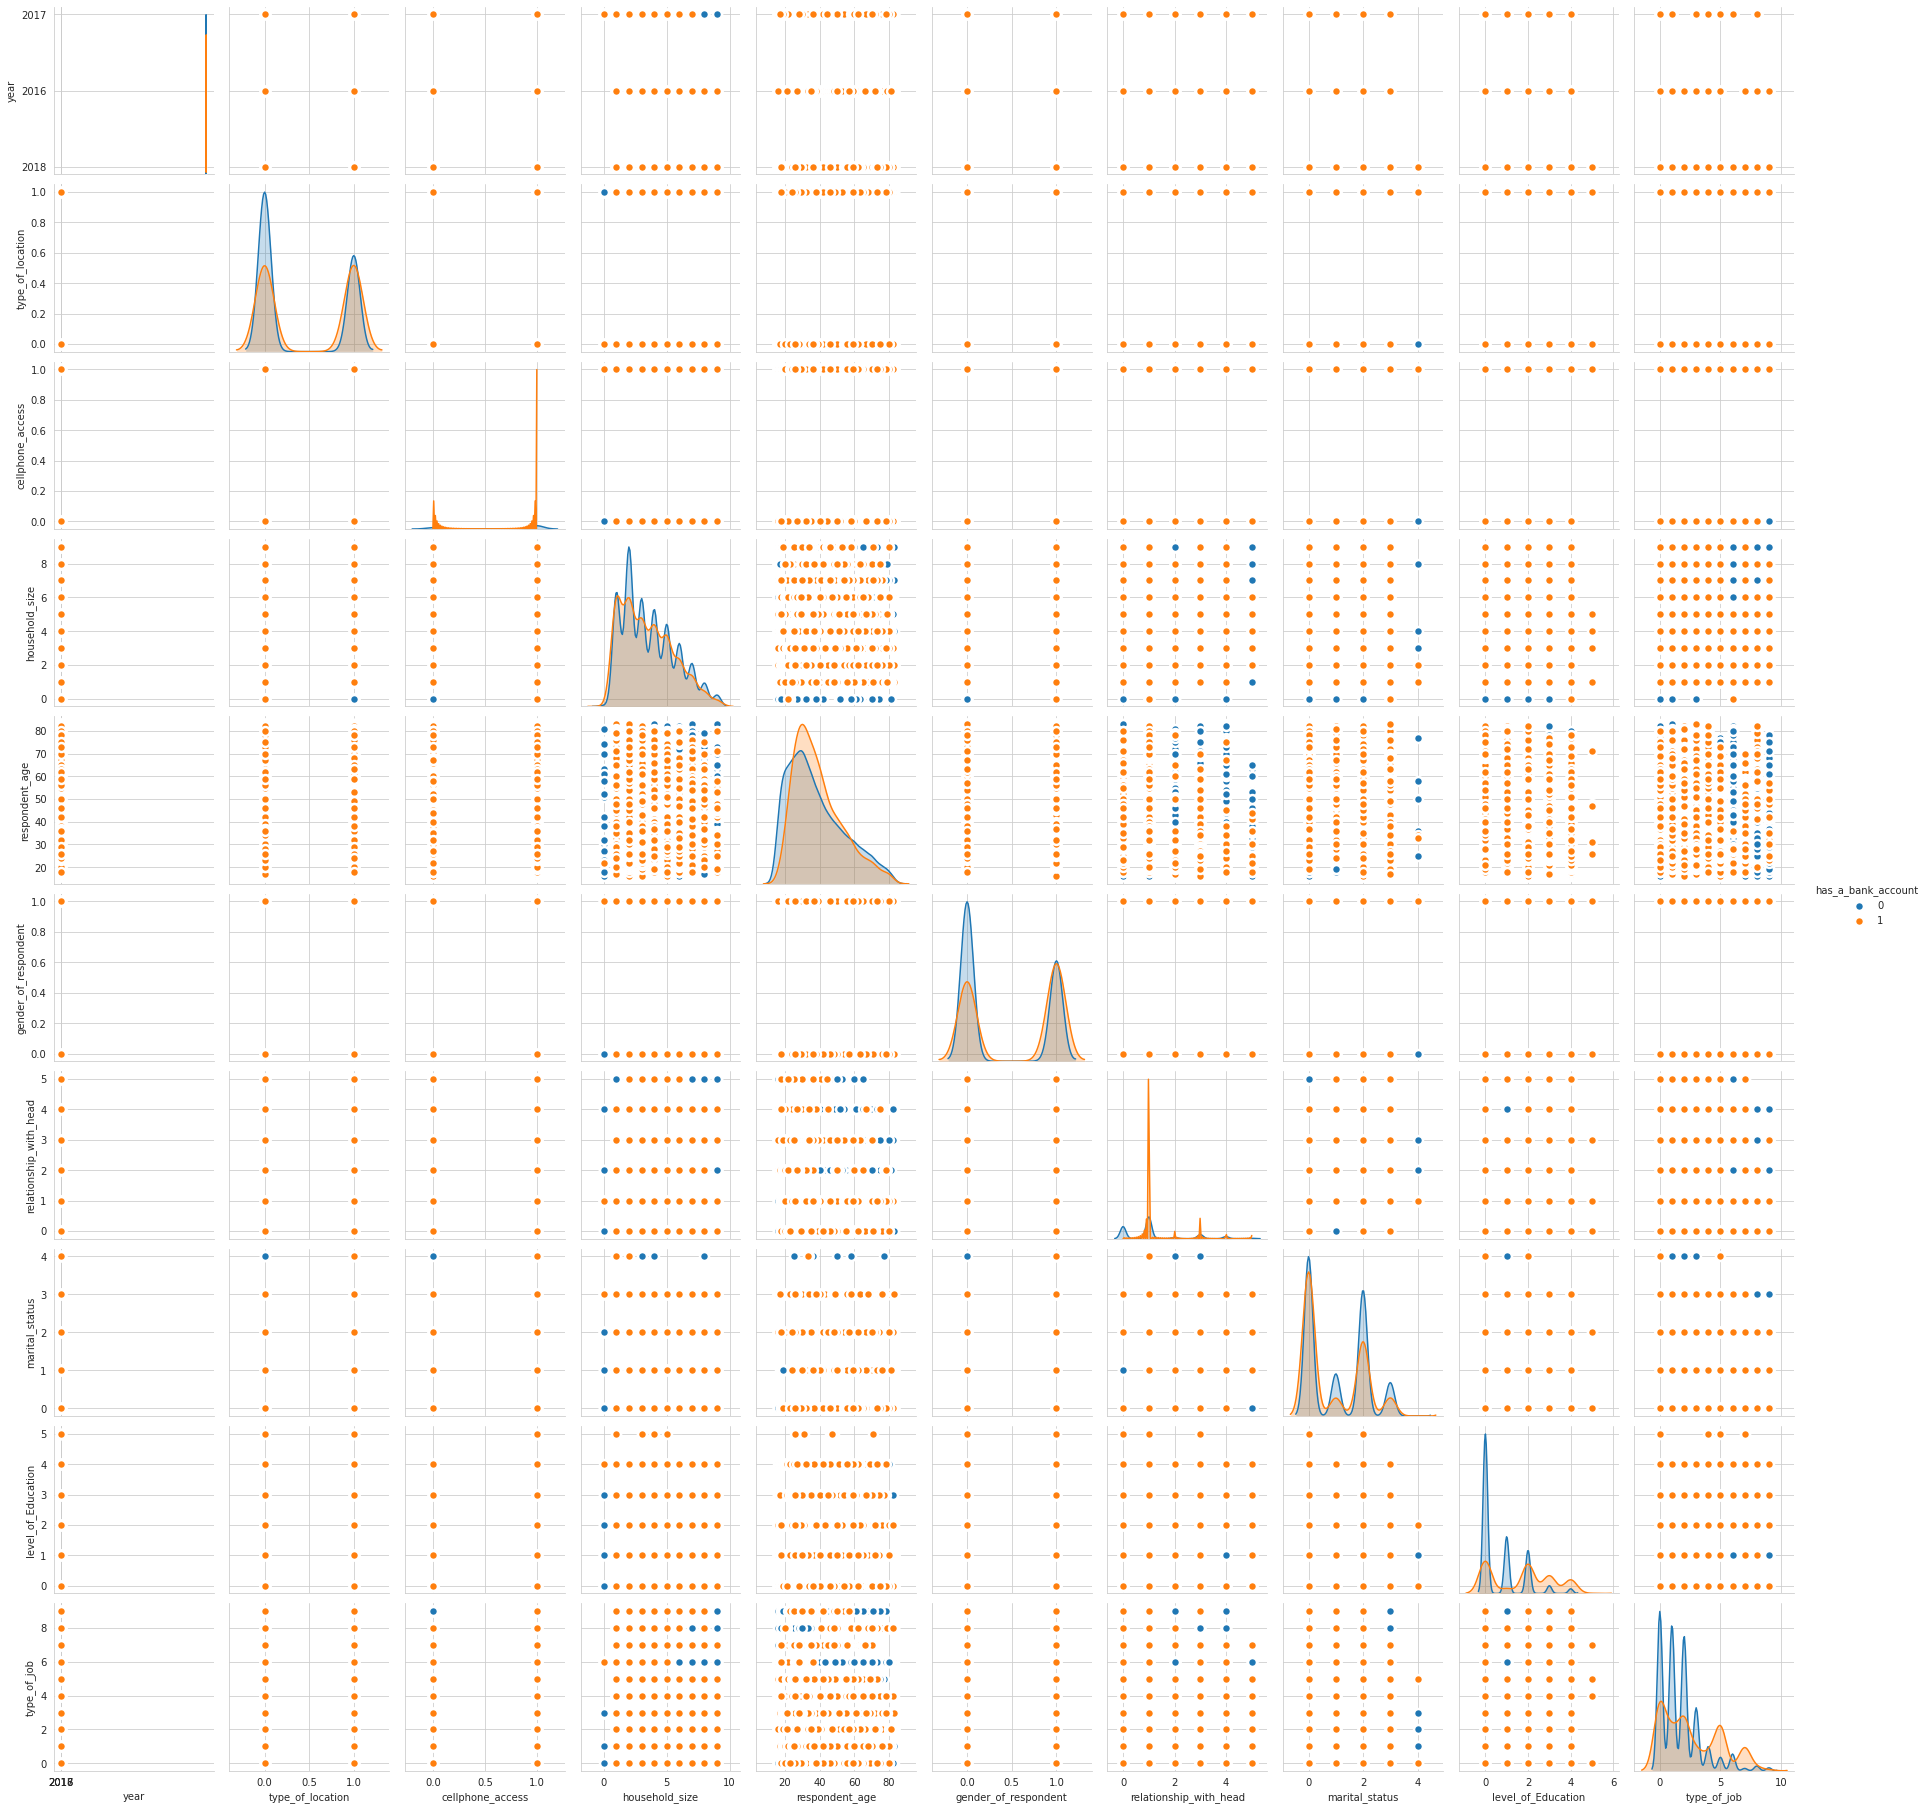

In [77]:
# Pair wise plots help in understanding the relationship between all possible pairs of numeric variables
# 
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df3, kind="scatter", hue="has_a_bank_account", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

> There's a negative correlation between respondent age and the household size in that as you move across the age bracket, the household size decreases.

>> The same plot also shows that people of advanced age owned bank accounts.

## Modelling

### Feature reduction

**Principal Component Analysis (PCA)**

> Principal component analysis, or PCA, is a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset. 

> The features are selected on the basis of variance that they cause in the output.

In [0]:
# First step is to divide the dataset into a feature set and corresponding labels
# 
X = df3.iloc[:, 3:12].values
y = df3['has_a_bank_account']

In [79]:
# Chek the shape of the data
print(X.shape)
print(y.shape)

(22878, 9)
(22878,)


In [0]:
# Split the data to train and test dataset
# 
from sklearn.model_selection import train_test_split
# 
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# Do Normalization using Standard Scaler
# 
from sklearn.preprocessing import StandardScaler
# 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [0]:
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods. 
# The transform method returns the specified number of principal components.
from sklearn.decomposition import PCA
# 
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [83]:
# Calculate the Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components.
# 
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.20335074, 0.17244987, 0.15201151, 0.11513569, 0.09405786,
       0.08560081, 0.06934935, 0.06637085, 0.04167331])

> We observe that there are 2 principal components

>> The first component accounts for 54% variance with the second component causing 46% variance

 ### Baseline Model

 **Logistic Regression**

In [99]:
# Use one component
pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
# # import the library to be used
# 
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)
# 
# Use the model to make a prediction
y_pred = LogReg.predict(X_test)
# 
# Evaluate the model
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# 
confusion_matrix = confusion_matrix(y_test, y_pred )
print(confusion_matrix)
# 
print('Accuracy' , accuracy_score(y_test, y_pred))

[[5888    0]
 [ 976    0]]
Accuracy 0.8578088578088578


> The model is able to predict correctly 5888 observations and only 976 observations incorrectly

> An accuracy of 85% is an indication of good model prediction

**Random Forest**

>> Random forests create decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting.

In [0]:
# Create a new dataframe with the features that we only need
df4 = df3.drop(columns=['country', 'year', 'uniqueid'], axis=1)

In [0]:
# Define our dependent and independent variables
# 
y = df4['has_a_bank_account'].values
# 
test_features = df4.columns.to_list()
test_features.remove('has_a_bank_account')
# 
X = df4[test_features].values
# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# 
# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

In [95]:
# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.sample(3)


,Actual,Predicted
4697,0,0.112836
123,0,0.038521
6109,0,0.098619


> We observe that the predictions are close to the actual values

In [200]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1834511342862029
Mean Squared Error: 0.09151083251420213
Root Mean Squared Error: 0.3025075743088132


> The MAE measures the average magnitude of the errors in a set of forecasts, without considering their direction

> MSE measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.

> Root Mean Square Error (RMSE) is the standard deviation of the residuals. Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are.

>> We consider RMSE where a small value shows that the model is good

## Recommendations and Conclusion

> Access to bank accounts has been regarded as an indicator of financial inclusion which we have observed from the data provided that it is yet to be achieved in all the countries considered above.

> All the countries should ensure that the citizen have access to financial services and products to provide them with shortterm and Longterm financial gain

> The Institution providing financial services should think about better product designs. An example is in the microcredit where they should try and match the repayment schedule to the cash flow of the customers.

> Financial literacy should be provided to the citizens to enable them understand how the different financial tools might be of help to them with consumer protection in place toon(True cost of borrowing)